# Lecture I: The Basics of Machine Learning

## Part I: Cross Entropy
First, let's start by importing some useful modules from pytorch

In [ ]:
import numpy as np
import torch
from torch.nn import BCELoss
import matplotlib
import matplotlib.pyplot as plt

The definition of $\textbf{Information Entropy}$ is as follow:
\begin{equation}
H(x)=\sum p(x)\log\frac{1}{p(x)}
\end{equation}
In a machine learning classifier, we ususally minimize $\textbf{Cross Entropy}$. The definition of cross entropy is as follow:
\begin{equation}
H(p,q)=\sum p(x)\log\frac{1}{q(x)}
\end{equation}
Notice that both $p(x)$ and $q(x)$ are probability distributions. If $p(x)$ is discrete, then the summation should be performed over all possible states of p; If $p(x)$ is continus, then the summation is converted to a integration. That is why oftentimes cross entropy is recorded as:
\begin{equation}
H(p,q)=-E_{p}[\log(q)]
\end{equation}
Let's say we have a binary classification problem, meaning that we are trying to classify each input into either $\textbf{signal}$ or $\textbf{background}$. For each input, our neural network $NN(x)$ will output a number between 0 and 1.
$\newline$ Thus, for input vector $\vec{x}$ which contains 8 events, we have:
\begin{equation}
NN(\vec{x})= [0.86, 0.26, 0.2 , 0.51, 0.44, 0.78, 0.9 , 0.25, 0.22, 0.68, 0.55,0.06, 0.66, 0.04, 0.17, 0.84, 0.26, 0.81, 0.07, 0.6 , 0.83, 0.26, 0.99, 0.61, 0.75, 0.04, 0.76, 0.16, 0.26, 0.25, 0.56, 0.76]
\end{equation}
$\newline$At the same time, each input in $\vec{x}$ come with a label of either 0 (background) or 1 (signal). Concatenating these labels into a vector, we have the label vector $\vec{y}$:
\begin{equation}
\vec{y}= [0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.]
\end{equation}
The first task of this lecture will be to calculate the cross-entropy of neural network output $NN(\vec{x})$ and label vector $\vec{y}$ using the $\textbf{Binary Cross Entropy}$ equation:
\begin{equation}
H_{BCE}= - y\log NN(x) - (1-y) \log(1-NN(x))
\end{equation}
$\textbf{Questions}$: Why is the binary cross entropy being written this way? Try to derive the equation above. (Hint: this might be trivial, but if $y=1$, what is its probability  of reading a value 1? what is its probability of reading a value 0?)

In [ ]:
NN_x = np.array([0.86, 0.26, 0.2 , 0.51, 0.44, 0.78, 0.9 , 0.25, 0.22, 0.68, 0.55,0.06, 0.66, 0.04, 0.17, 0.84, 0.26, 0.81, 0.07, 0.6 , 0.83, 0.26, 0.99, 0.61, 0.75, 0.04, 0.76, 0.16, 0.26, 0.25, 0.56, 0.76])
y = np.array([0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.])
H = 0#Write out the equation to calculate the cross entropy here, you may need to use np.sum to sum and np.log to calculate logarithmic values
print("The Cross Entropy is %.3f, Average CE per event is %.3f"%(H, H/len(y)))

Now, let's check our answer with the nn.BCELoss:

In [ ]:
NN_x = torch.FloatTensor([0.86, 0.26, 0.2 , 0.51, 0.44, 0.78, 0.9 , 0.25, 0.22, 0.68, 0.55,0.06, 0.66, 0.04, 0.17, 0.84, 0.26, 0.81, 0.07, 0.6 , 0.83, 0.26, 0.99, 0.61, 0.75, 0.04, 0.76, 0.16, 0.26, 0.25, 0.56, 0.76])
y = torch.FloatTensor([0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.])
BinaryCrossEntropy = BCELoss(reduction="mean")    #reduction="mean" means that we are calculating the BCE loss of each element instead of the whole vector
loss = BinaryCrossEntropy(NN_x,y)
print("The PyTorch calculation of binary cross entropy is %.3f, does it agree with average CE per event in your previous calculation?"%(loss.item()))

Let's say, after certain epochs of training, the neural network $NN(x)$ is able to produce a different network output for the same input vector $\vec{x}$:
\begin{equation}
NN(\vec{x})= [0.26, 0.16, 0.72 , 0.51, 0.74, 0.28, 0.9 , 0.75, 0.22, 0.68, 0.85,0.06, 0.66, 0.84, 0.67, 0.74, 0.26, 0.81, 0.57, 0.6 , 0.23, 0.26, 0.99, 0.61, 0.35, 0.04, 0.76, 0.16, 0.26, 0.25, 0.56, 0.76]
\end{equation}
Calculate the cross entropy again:

In [ ]:
NN_x_new = np.array([0.26, 0.16, 0.72 , 0.51, 0.74, 0.28, 0.9 , 0.75, 0.22, 0.68, 0.85,0.06, 0.66, 0.84, 0.67, 0.74, 0.26, 0.81, 0.57, 0.6 , 0.23, 0.26, 0.99, 0.61, 0.35, 0.04, 0.76, 0.16, 0.26, 0.25, 0.56, 0.76])
y = np.array(0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.])
H = #Write out the equation to calculate the cross entropy here, you may need to use np.sum to sum and np.log to calculate logarithmic values
print("The Cross Entropy is %.3f, Average CE per event is %.3f"%(H, H/len(y)))

Using the PyTorch nn.BCELoss to check for your answer:

In [ ]:
NN_x_new = torch.FloatTensor([0.26, 0.16, 0.72 , 0.51, 0.74, 0.28, 0.9 , 0.75, 0.22, 0.68, 0.85,0.06, 0.66, 0.84, 0.67, 0.74, 0.26, 0.81, 0.57, 0.6 , 0.23, 0.26, 0.99, 0.61, 0.35, 0.04, 0.76, 0.16, 0.26, 0.25, 0.56, 0.76])
y = torch.FloatTensor([0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.])
BinaryCrossEntropy = BCELoss(reduction="mean")    #reduction="mean" means that we are calculating the BCE loss of each element instead of the whole vector
loss_new = BinaryCrossEntropy(NN_x_new,y)
print("The PyTorch calculation of binary cross entropy is %.3f, does it agree with Average CE per event in your previous calculation?"%(loss_new.item()))

Finally, let's plot the network output distributions of both $NN\_x$ and $NN\_x\_new$:

In [ ]:
y_plot = y.numpy().flatten()
NN_x_new_plot = NN_x_new.numpy().flatten()
NN_x_plot = NN_x.numpy().flatten()
signal_index = y_plot == 1     #Select signal event based on their label in y vector
background_index = y_plot == 0 #Select background event based on their label in y vector
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.ylim(0,10)
binrange = np.arange(0,1,0.1)
plt.hist(NN_x_plot[signal_index],histtype="step",label="Signal",linewidth=2, bins=binrange)
plt.hist(NN_x_plot[background_index],alpha=0.3,label="Background", bins=binrange)
plt.title("Original Network Output: Cross Entrophy = %.3f"%(loss.item()))
plt.legend()
plt.xlabel("Network Output")
plt.ylabel("Counts")
plt.yscale
plt.subplot(122)
plt.ylim(0,10)
plt.hist(NN_x_new_plot[signal_index],histtype="step",label="Signal",linewidth=2, bins=binrange)
plt.hist(NN_x_new_plot[background_index],alpha=0.3,label="Background", bins=binrange)
plt.title("Updated Network Output: Cross Entrophy = %.3f"%(loss_new.item()))
plt.legend()
plt.xlabel("Network Output")
plt.ylabel("Counts")

$\textbf{Questions}$: as the cross entropy getting lower, does the neural network produce a new probability distribution $q(x)$ that separate signal and background better?

## Part II: Backpropagation
Next, we will practice the $\textbf{backpropagation}$ calculation on a given computational graph:
$\newline$
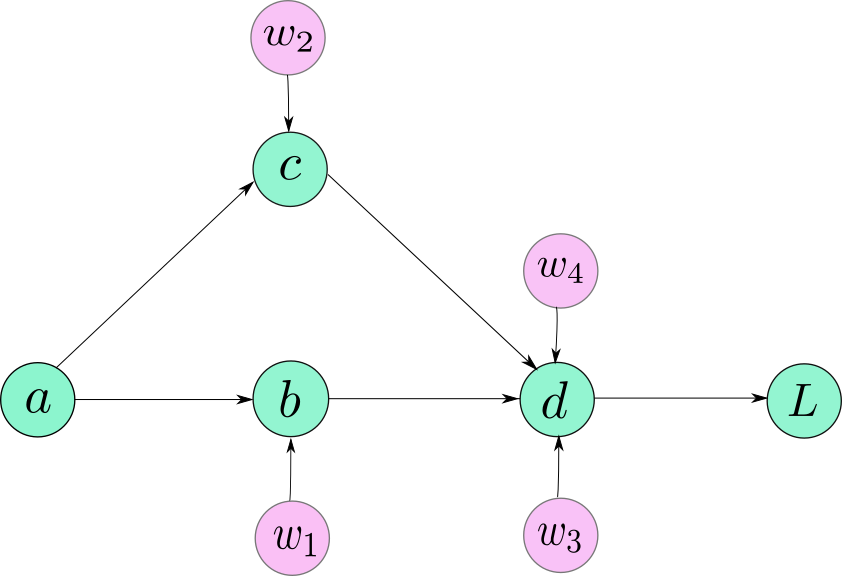
$\newline$
(The computation graph is in courtesy by: https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/)
The calculation is defined as:
\begin{equation}
b = w_{1}\times a\\
c = w_{2}\times a\\
d = w_{3}\times b + w_{4}\times c\\
L = 10-d
\end{equation}
First, let's initialize the variables:

In [ ]:
a = torch.tensor(1., requires_grad=True)
w1 = torch.tensor(2., requires_grad=True)
w2 = torch.tensor(2., requires_grad=True)
w3 = torch.tensor(2., requires_grad=True)
w4 = torch.tensor(2., requires_grad=True)

Note that I've set `requires_grad=True`, this will assign a `grad` tensor to each variable to store the gradient values. The `grad` tensor can be accessed by `varname.grad` Let's check this:

In [ ]:
print("requires_grad: ", a.requires_grad, w1.requires_grad, w2.requires_grad, w3.requires_grad,w4.requires_grad)
print("grad: ", a.grad, w1.grad, w2.grad, w3.grad,w4.grad)

Since no gradient has been calculated so far, the grad tensor is `None` at this point.

Next, let's define the calculation:

In [ ]:
b = a * w1
c = a * w2
d = w3 * b + w4 * c
L = 10 - d

Note that: when we define the calculation, we assignd a few more intermediate variables `b,c,d,L`. `a,w1,w2,w3,w4` are called $\textbf{leaf node}$ in the computation graph, while `b,c,d,L` are non-leaf node. Let's check this:

In [ ]:
print("[a, w1, w2, w3, w4] is_leaf: ", a.is_leaf, w1.is_leaf, w2.is_leaf, w3.is_leaf, w4.is_leaf)
print("[b, c, d, L] is_leaf: ", b.is_leaf, c.is_leaf, d.is_leaf, L.is_leaf)

Now, let's calculate the gradient. There are 2 ways to calculate gradient, one way is using `torch.autograd`:

In [ ]:
grad = torch.autograd.grad(outputs=L, inputs=a, retain_graph=True)
print(grad)

To save memory, PyTorch releases the gradient of all non-leaf node after the gradient is calculated. Thus, if you run the code two times without `retain_graph=True`, it will report a run time error saying: `Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.` `retain_graph=True` allows us to save the gradient values for non-leaf node for further calculation.

The other way is usig `varname.backward()`

In [ ]:
L.backward(retain_graph=True)
print(a.grad)

PyTorch accumulate gradient on the `.grad` variable over multiple calls of `backward()`. Let's verify this:

In [ ]:
for i in range(10):
    L.backward(retain_graph=True)
    print(r"The gradient of %dth call is: %.2f"%(i, a.grad))

To avoid this, we need to reset the gradient value of the given variable to 0 using `a.grad.zero_()`:

In [ ]:
for i in range(10):
    a.grad.zero_()
    L.backward(retain_graph=True)
    print(r"The gradient of %dth call is: %.2f"%(i, a.grad))

Finally, we can detach part of the computation graph from the calculation using `.detach()` call. If the node is detached, the computation of gradient along this path will be disabled, and no gradient will flow through these nodes. Let's try this:

In [ ]:
#Define the model
b = a * w1
c = a * w2
d = w3 * b + w4 * c
L = 10 - d
grad = torch.autograd.grad(outputs=L, inputs=a)
print("gradient before detachment: %.2f"%(grad))

#Define the model, but detach non-leaf node c from the graph
b = a * w1
c = a * w2
d = w3 * b + w4 * c.detach()
L = 10 - d
grad = torch.autograd.grad(outputs=L, inputs=a)
print("gradient after c is detached: %.2f"%(grad))

$\textbf{Question}$: The full computation graph is shown below:

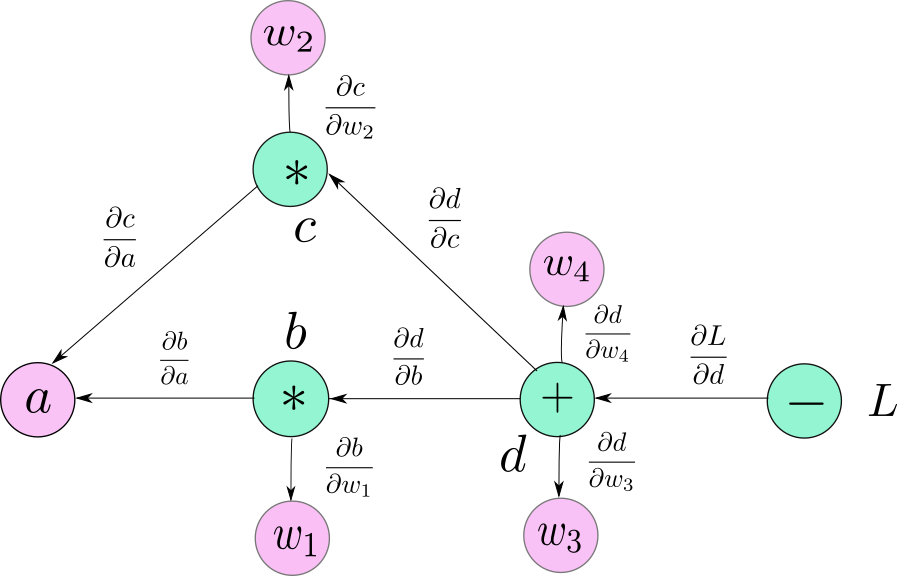

Please use the chain rule and calculus to verify the gradient value before/after the detachment is correct.